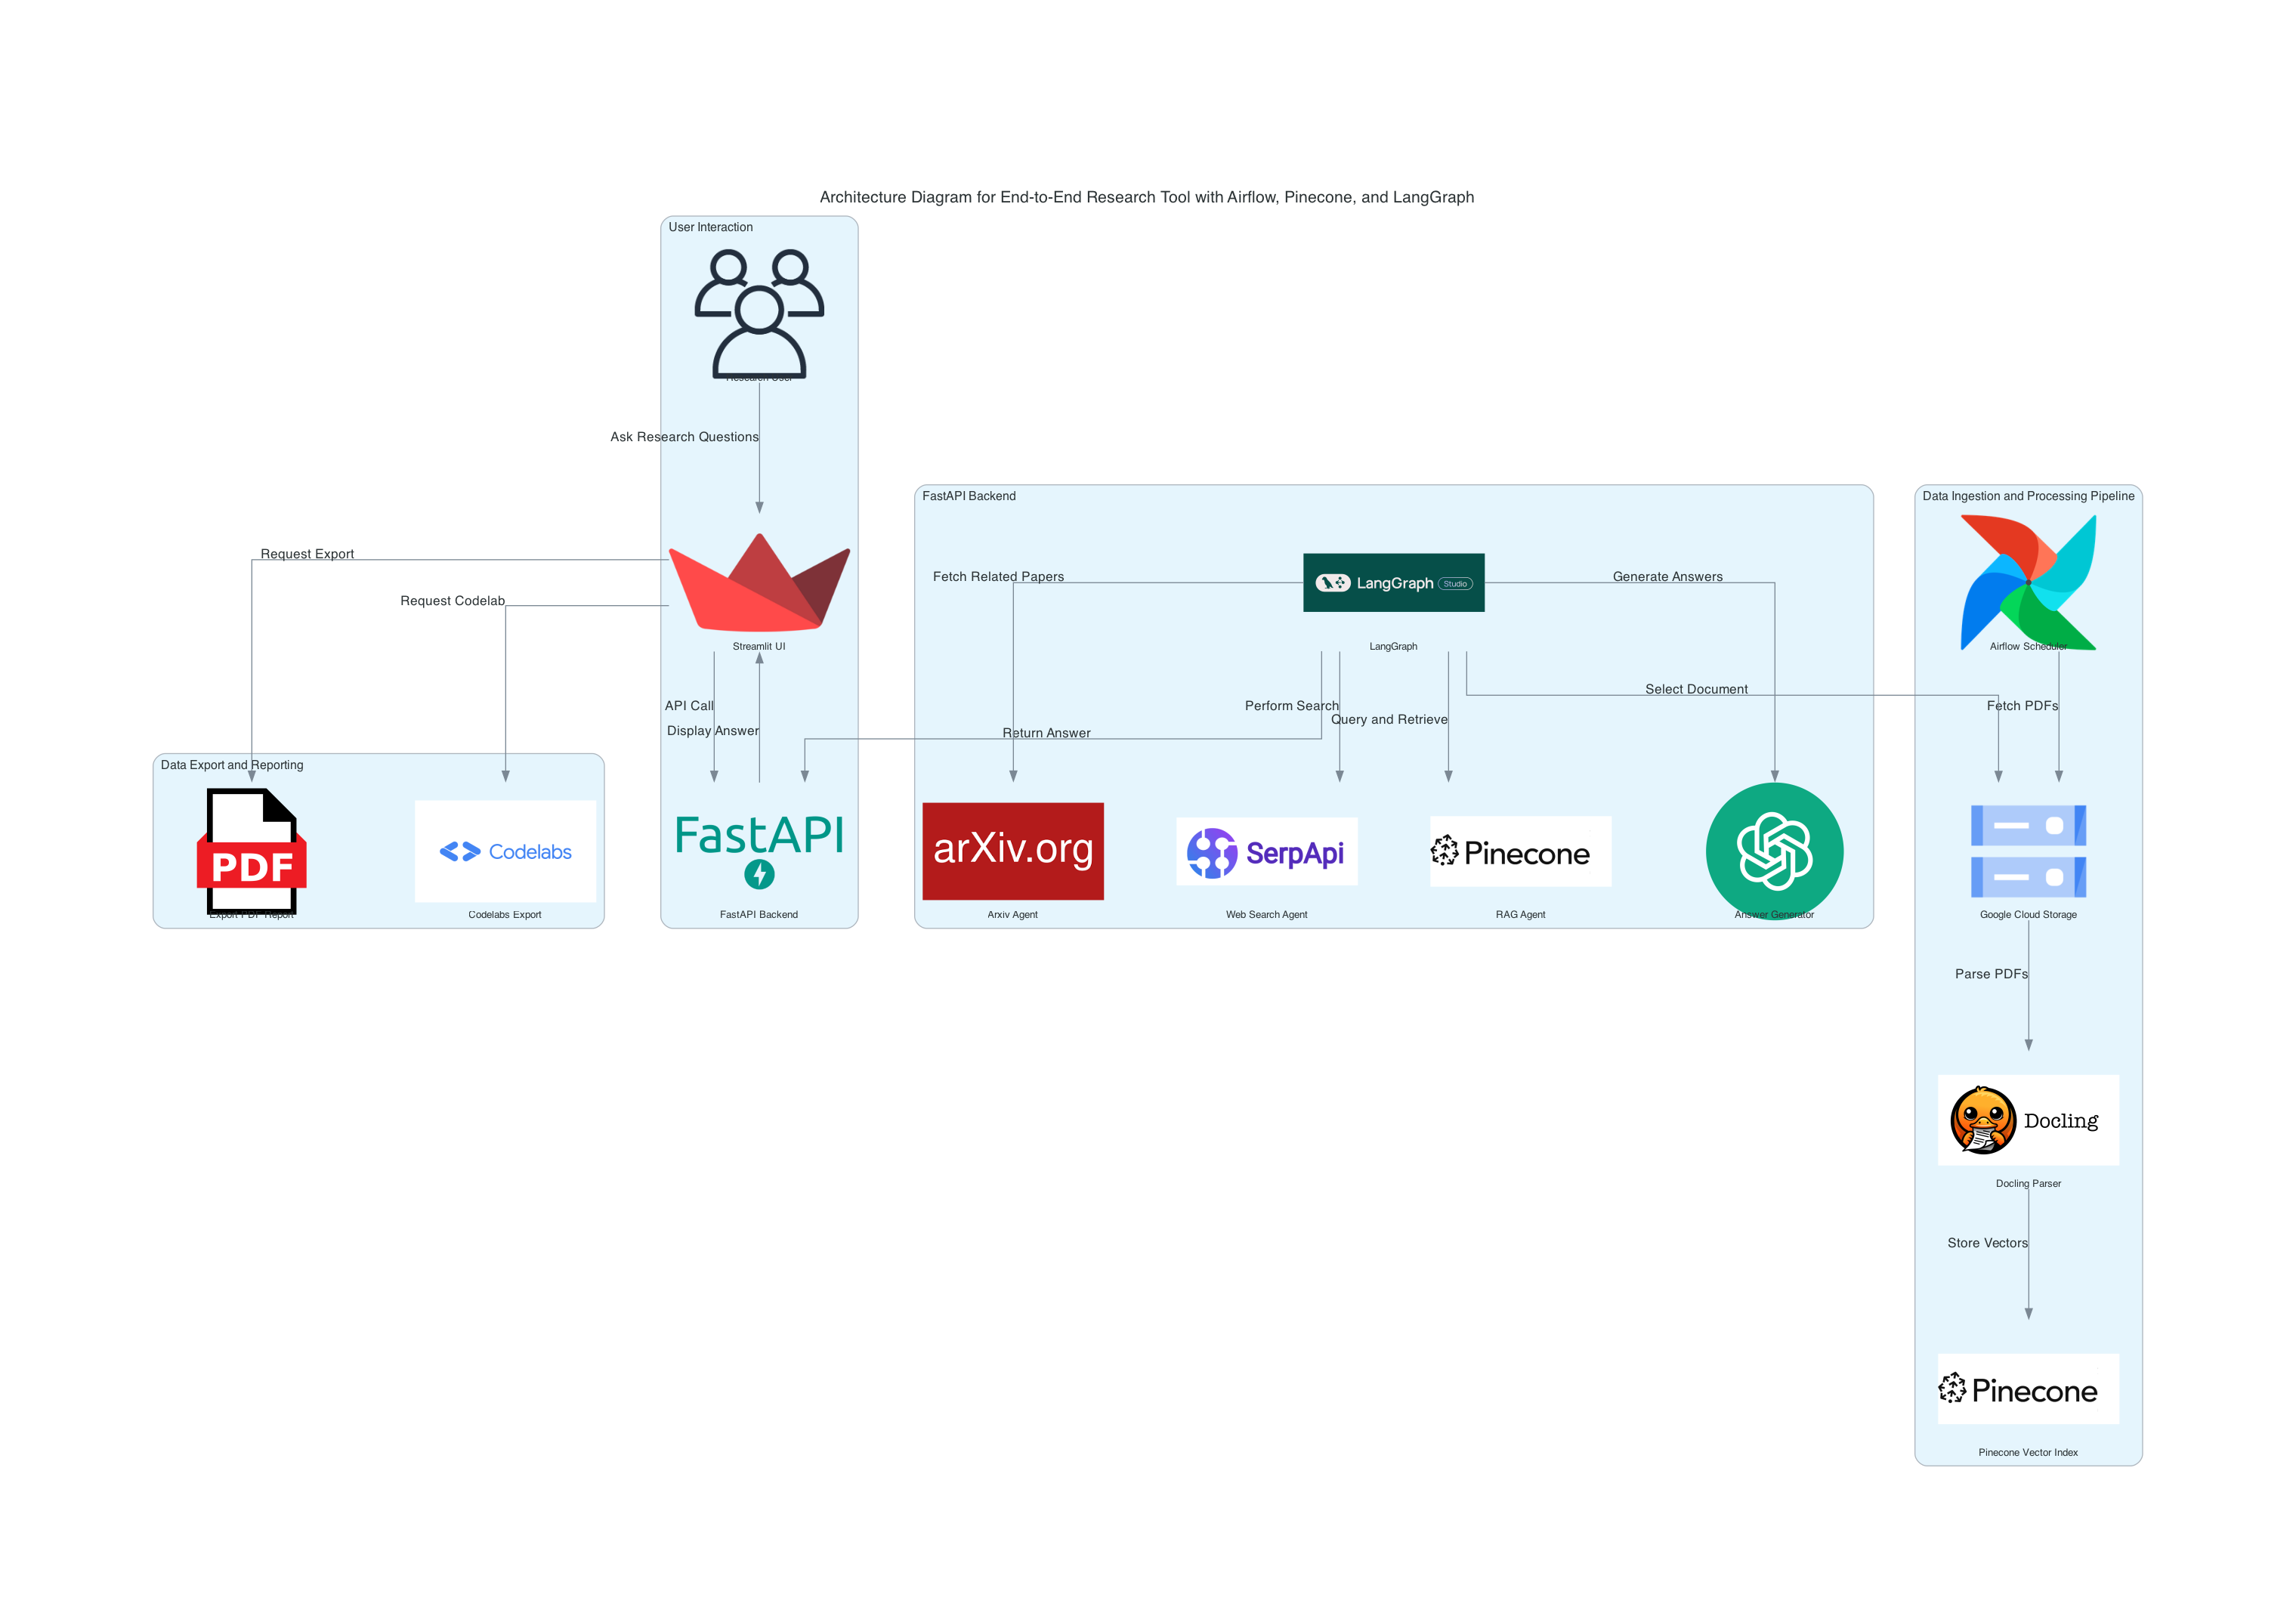

In [77]:
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.storage import GCS
from diagrams.custom import Custom
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.client import Users

# Define icons for custom components
docling_logo = "docling_logo.png"
pinecone_logo = "pinecone_logo.png"
langgraph_logo = "langgraph_logo.png"
streamlit_logo = "streamlit_logo.png"
fastapi_logo = "fastapi_logo.png"
openai_logo = "openai_logo.png"
arxiv_logo = "arxiv_logo.png"
serpapi_logo = "serpapi_logo.png"

# Diagram attributes for clarity
graph_attr = {
    "fontsize": "16",
    "labelloc": "t",
    "label": "\n\nArchitecture Diagram for End-to-End Research Tool with Airflow, Pinecone, and LangGraph",
    "ranksep": "1.8",
    "nodesep": "1.0",
}

node_attr = {
    "fontsize": "10",
    "width": "2.5",
    "height": "1.5",
}

with Diagram("architecture_diagram", show=False, filename="architecture_diagram", outformat="png", graph_attr=graph_attr, node_attr=node_attr, direction="TB") as diag:
    # Client Interaction Layer
    with Cluster("User Interaction"):
        user = Users("Research User")
        streamlit_ui = Custom("Streamlit UI", streamlit_logo)
        fastapi_api = Custom("FastAPI Backend", fastapi_logo)
        
    user >> Edge(xlabel="Ask Research Questions") >> streamlit_ui
    streamlit_ui >> Edge(xlabel="API Call") >> fastapi_api

    # Data Ingestion and Processing Layer
    with Cluster("Data Ingestion and Processing Pipeline"):
        airflow_scheduler = Airflow("Airflow Scheduler")
        gcs_storage = GCS("Google Cloud Storage")
        docling = Custom("Docling Parser", docling_logo)
        pinecone_index = Custom("Pinecone Vector Index", pinecone_logo)

    # Airflow Pipeline and Document Parsing with Docling
    airflow_scheduler >> Edge(xlabel="Fetch PDFs") >> gcs_storage
    gcs_storage >> Edge(xlabel="Parse PDFs") >> docling
    docling >> Edge(xlabel="Store Vectors") >> pinecone_index

    # FastAPI Backend with Multi-Agent System
    with Cluster("FastAPI Backend"):
        langgraph = Custom("LangGraph", langgraph_logo)
        document_selector = gcs_storage  # Document Selector directly linked to GCS
        arxiv_agent = Custom("Arxiv Agent", arxiv_logo)
        web_search_agent = Custom("Web Search Agent", serpapi_logo)
        rag_agent = Custom("RAG Agent", pinecone_logo)
        answer_generator = Custom("Answer Generator", openai_logo)
        
        langgraph >> Edge(xlabel="Select Document") >> document_selector
        langgraph >> Edge(xlabel="Fetch Related Papers") >> arxiv_agent
        langgraph >> Edge(xlabel="Perform Search") >> web_search_agent
        langgraph >> Edge(xlabel="Query and Retrieve") >> rag_agent
        langgraph >> Edge(xlabel="Generate Answers") >> answer_generator

    # Flow of Information from FastAPI to Streamlit
    langgraph >> Edge(xlabel="Return Answer") >> fastapi_api
    fastapi_api >> Edge(xlabel="Display Answer") >> streamlit_ui

    # Data Export and Reporting Cluster
    with Cluster("Data Export and Reporting"):
        report_export = Custom("Export PDF Report", "pdf_icon.png")
        codelab_export = Custom("Codelabs Export", "codelab_icon.png")
        
    streamlit_ui >> Edge(xlabel="Request Export") >> report_export
    streamlit_ui >> Edge(xlabel="Request Codelab") >> codelab_export

diag
